<a href="https://colab.research.google.com/github/etmcrae/Project-3/blob/main/SQL_1_Chinook_EMCRAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project SQL - Chinook - Emily McRae**


## **Data Question**

"*..the diminishment of hip hop music as a hermeneutical resource for Black and Latinx persons by white supremacy promotes the ubiquity of ignorance of racial injustice in North America. To this end, I will defend what I call the hermeneutical-diminishment thesis. According to this thesis, white supremacy has diminished hip hop as a hermeneutical resource for Black and Latinx persons.*" **- Eric Bayruns García,**

29 January 2025 in the Oxford Academic publication, Hournal of Aesthetics & Art Critcisms, [*Black and Latinx hermeneutical resources, hip hop music and white supremacy*](https://academic.oup.com/jaac/advance-article/doi/10.1093/jaac/kpae046/7989425#502182523)

This journal publication discusses the topic of *white supremacy culture* which silences voices. The example in this artcile covers how in the early 2000's, market research suggested that rap music promoting materialism and violence, was high in demand among white audiences so you would be more likely to get signed if you wrote this content and in turn, many artists began to write this way to get signed. Narratives that spoke about life experiences and visions for the future were less profitable and so were not signed onto records as often. They speak about the difference in above ground and underground artists, and how this marketing acts to silence voices which would spark resistence and activism towards equality for Black Indigenous People of Color (BIPOC) communities. For this reason, I seek to look in this data, which occures in the early 2000's - the same time frame referenced in the article - to analyze:

* What genres are the most 'profitable'?
    * From this question, I am mostly interested in starting a discussion about which genres mainstream media companies are willing to support and provide opportunity to and investment in.
* I hypothesize that genres which are popular among white supremacy cultures will have the most money funnelled into them.
* I recognize that this database does not contain sufficient data to make meaningul analysis without additional data about media consumption.

## All 15 Queries were used in the below checklist:

1.   Select with * and Select with column names
2.   DISTINCT
3.   JOIN
4.   GROUP BY
5.   ORDER BY
6.   COUNT
7.   AND
8.   OR
9.   BETWEEN
10.  LIMIT
11.  LIKE (with % or _ wildcard)
12.  SUM
13.  MAX
14.  MIN
15.  AVG




## **Importing the Chinook data set as well as all libraries**

In this section all libraries are imported, including sqlite3 and others, and the Chinook database is imported as well.


In [1]:
# Install the sqlite package for Ubuntu
# Download the Chinook sqlite database
import sqlite3 as db
import pandas as pd


In [2]:
%%capture
%%bash
apt-get update
apt-get install -y sqlite3

In [3]:
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip


Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [4]:
!rm -f chinook.db
!unzip -u chinook.zip
!ls -la


Archive:  chinook.zip
  inflating: chinook.db              
total 1180
drwxr-xr-x 1 root root   4096 Apr  4 19:10 .
drwxr-xr-x 1 root root   4096 Apr  4 19:09 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Apr  4 19:10 chinook.zip
drwxr-xr-x 4 root root   4096 Apr  3 13:37 .config
drwxr-xr-x 1 root root   4096 Apr  3 13:37 sample_data


In [5]:
#connect to sqlite db and load this to dataframe
db_con = db.connect('chinook.db')


I am going to look at how the genre of music relates to the invoice amount and number of invoices.

In [6]:
# Select the first 10 entries from the invoice_items table
query = '''
  select *
  from invoice_items
  limit 10
'''

invoice_items = pd.read_sql_query( query , db_con)
invoice_items

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
0,1,1,2,0.99,1
1,2,1,4,0.99,1
2,3,2,6,0.99,1
3,4,2,8,0.99,1
4,5,2,10,0.99,1
5,6,2,12,0.99,1
6,7,3,16,0.99,1
7,8,3,20,0.99,1
8,9,3,24,0.99,1
9,10,3,28,0.99,1


In [7]:
# Select the first 10 entries from the genres table
query = '''
  select *
  from genres
  limit 10
'''

genres = pd.read_sql_query( query , db_con)
genres

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll
5,6,Blues
6,7,Latin
7,8,Reggae
8,9,Pop
9,10,Soundtrack


In [8]:
# Select the first 10 entries from the customers table
query = '''
  select *
  from customers
  limit 10
'''

customers = pd.read_sql_query( query , db_con)
customers

,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,2,Leonie,Köhler,None,Theodor-Heuss-Straße 34,Stuttgart,None,Germany,70174,+49 0711 2842222,None,leonekohler@surfeu.de,5
2,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
3,4,Bjørn,Hansen,None,Ullevålsveien 14,Oslo,None,Norway,0171,+47 22 44 22 22,None,bjorn.hansen@yahoo.no,4
4,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
5,6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
6,7,Astrid,Gruber,None,"Rotenturmstraße 4, 1010 Innere Stadt",Vienne,None,Austria,1010,+43 01 5134505,None,astrid.gruber@apple.at,5
7,8,Daan,Peeters,None,Grétrystraat 63,Brussels,None,Belgium,1000,+32 02 219 03 03,None,daan_peeters@apple.be,4
8,9,Kara,Nielsen,None,Sønder Boulevard 51,Copenhagen,None,Denmark,1720,+453 3331 9991,None,kara.nielsen@jubii.dk,4
9,10,Eduardo,Martins,Woodstock Discos,"Rua Dr. Falcão Filho, 155",São Paulo,SP,Brazil,01007-010,+55 (11) 3033-5446,+55 (11) 3033-4564,eduardo@woodstock.com.br,4


In [9]:
# Count the number of unique genres
%%script sqlite3 --column --header chinook.db
select count(distinct Name)
from genres

count(distinct Name)
--------------------
25                  


In [10]:
#unique tracks sorted by the genre in descending order.
query = '''
SELECT g.Name, COUNT(*) AS NameCount
FROM genres g
JOIN tracks t ON g.GenreId = t.GenreId  -- Join with the 'tracks' table
GROUP BY g.Name
ORDER BY NameCount DESC;
'''
genre_counts = pd.read_sql_query(query, db_con)
export_csv = genre_counts.to_csv (r'genre_counts.csv', index = None, header=True)
print(genre_counts)

                  Name  NameCount
0                 Rock       1297
1                Latin        579
2                Metal        374
3   Alternative & Punk        332
4                 Jazz        130
5             TV Shows         93
6                Blues         81
7            Classical         74
8                Drama         64
9             R&B/Soul         61
10              Reggae         58
11                 Pop         48
12          Soundtrack         43
13         Alternative         40
14         Hip Hop/Rap         35
15   Electronica/Dance         30
16               World         28
17         Heavy Metal         28
18    Sci Fi & Fantasy         26
19      Easy Listening         24
20              Comedy         17
21          Bossa Nova         15
22     Science Fiction         13
23       Rock And Roll         12
24               Opera          1


In [11]:
#unique tracks sorted by the genre in descending order.
query = '''
SELECT g.Name, i.UnitPrice  -- Select the genre name and UnitPrice
FROM genres g
JOIN tracks t ON g.GenreId = t.GenreId  -- Join with the 'tracks' table
JOIN invoice_items i ON t.TrackId = i.TrackId  -- Join with the 'invoice_items' table
JOIN invoices inv ON i.InvoiceId = inv.InvoiceId --Join with the invoices table
JOIN customers cust ON inv.CustomerId = cust.CustomerId --Join with the customers table

WHERE g.Name NOT IN ('Opera', 'Science Fiction', 'TV Shows', 'Comedy', 'Sci Fi & Fantasy', 'Drama', 'Soundtrack') -- Filter genres
GROUP BY g.Name, i.UnitPrice  -- Group by genre name and unit price to see individual combinations
ORDER BY i.UnitPrice DESC; -- Order by i.UnitPrice in descending order
'''
genre_invoice = pd.read_sql_query(query, db_con)
print(genre_invoice)

                  Name  UnitPrice
0          Alternative       0.99
1   Alternative & Punk       0.99
2                Blues       0.99
3           Bossa Nova       0.99
4            Classical       0.99
5       Easy Listening       0.99
6    Electronica/Dance       0.99
7          Heavy Metal       0.99
8          Hip Hop/Rap       0.99
9                 Jazz       0.99
10               Latin       0.99
11               Metal       0.99
12                 Pop       0.99
13            R&B/Soul       0.99
14              Reggae       0.99
15                Rock       0.99
16       Rock And Roll       0.99
17               World       0.99


In [12]:
#unique tracks sorted by the genre in descending order.
query = '''
SELECT g.Name, SUM(i.UnitPrice * i.Quantity) AS SumPrice  -- Select the genre name and calculate the sum price
FROM genres g
JOIN tracks t ON g.GenreId = t.GenreId  -- Join with the 'tracks' table
JOIN invoice_items i ON t.TrackId = i.TrackId  -- Join with the 'invoice_items' table
JOIN invoices inv ON i.InvoiceId = inv.InvoiceId --Join with the invoices table
JOIN customers cust ON inv.CustomerId = cust.CustomerId --Join with the customers table

WHERE g.Name NOT IN ('Opera', 'Science Fiction', 'TV Shows', 'Comedy', 'Sci Fi & Fantasy', 'Drama', 'Soundtrack') -- Filter genres
GROUP BY g.Name  -- Group by genre name to calculate the sum for each genre
ORDER BY SumPrice DESC; -- Order by SumPrice in descending order
'''
genre_invoice = pd.read_sql_query(query, db_con)
print(genre_invoice)

                  Name  SumPrice
0                 Rock    826.65
1                Latin    382.14
2                Metal    261.36
3   Alternative & Punk    241.56
4                 Jazz     79.20
5                Blues     60.39
6             R&B/Soul     40.59
7            Classical     40.59
8               Reggae     29.70
9                  Pop     27.72
10         Hip Hop/Rap     16.83
11          Bossa Nova     14.85
12         Alternative     13.86
13               World     12.87
14         Heavy Metal     11.88
15   Electronica/Dance     11.88
16      Easy Listening      9.90
17       Rock And Roll      5.94


In [13]:
#unique tracks sorted by the genre in descending order.
query = '''
SELECT
    CASE
        WHEN g.Name IN ('World', 'Bossa Nova') THEN 'World/Bossa Nova'
        WHEN g.Name IN ('Rock And Roll', 'Rock') THEN 'Rock'  -- Combine "Rock And Roll" and "Rock"
        WHEN g.Name IN ('Metal', 'Heavy Metal') THEN 'Metal'  -- Combine "Metal" and "Heavy Metal"
        ELSE g.Name  -- Keep other genres as they are
    END AS ReclassifiedGenre,
    SUM(i.UnitPrice * i.Quantity) AS SumPrice  -- Select the genre name and calculate the sum price
FROM genres g
JOIN tracks t ON g.GenreId = t.GenreId  -- Join with the 'tracks' table
JOIN invoice_items i ON t.TrackId = i.TrackId  -- Join with the 'invoice_items' table
JOIN invoices inv ON i.InvoiceId = inv.InvoiceId --Join with the invoices table
JOIN customers cust ON inv.CustomerId = cust.CustomerId --Join with the customers table

WHERE g.Name NOT IN ('Opera', 'Science Fiction', 'TV Shows', 'Comedy', 'Sci Fi & Fantasy', 'Drama', 'Soundtrack') -- Filter genres
GROUP BY ReclassifiedGenre  -- Group by reclassified genre name to calculate the sum for each genre
ORDER BY SumPrice DESC; -- Order by SumPrice in descending order
'''
genre_invoice = pd.read_sql_query(query, db_con)
print(genre_invoice)

     ReclassifiedGenre  SumPrice
0                 Rock    832.59
1                Latin    382.14
2                Metal    273.24
3   Alternative & Punk    241.56
4                 Jazz     79.20
5                Blues     60.39
6             R&B/Soul     40.59
7            Classical     40.59
8               Reggae     29.70
9     World/Bossa Nova     27.72
10                 Pop     27.72
11         Hip Hop/Rap     16.83
12         Alternative     13.86
13   Electronica/Dance     11.88
14      Easy Listening      9.90


In [14]:
# Select the first 10 entries from the employees table to view all columns
query = '''
  select *
  from employees
  limit 10
'''

employees = pd.read_sql_query( query , db_con)
employees

,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


In [15]:
query = '''
SELECT
    MIN(HireDate) AS EarliestHireDate,  -- Find the earliest hire date
    MAX(HireDate) AS LatestHireDate   -- Find the latest hire date
FROM employees;
'''

hire_dates = pd.read_sql_query(query, db_con)
print(hire_dates)

      EarliestHireDate       LatestHireDate
0  2002-04-01 00:00:00  2004-03-04 00:00:00


In [16]:
query = '''
SELECT
    MIN(BirthDate) AS EarliestbirthDate,  -- Find the earliest birth date
    MAX(BirthDate) AS LatestbirthDate   -- Find the latest birth date
FROM employees;
'''

birth_dates = pd.read_sql_query(query, db_con)
print(birth_dates)

     EarliestbirthDate      LatestbirthDate
0  1947-09-19 00:00:00  1973-08-29 00:00:00


In [17]:
import sqlite3
import pandas as pd

# Assuming you have already established a connection to the database as 'db_con'

query = """
SELECT
    CAST(AVG(JULIANDAY(HireDate) - JULIANDAY(BirthDate)) AS REAL) / 365.25 AS AverageAgeAtHire
FROM employees;
"""

average_age = pd.read_sql_query(query, db_con)
print(average_age)

   AverageAgeAtHire
0         38.343943


In [18]:
query = """
SELECT DISTINCT Country
FROM employees;
"""

distinct_countries = pd.read_sql_query(query, db_con)
print(distinct_countries)

  Country
0  Canada


In [19]:
query = """
SELECT DISTINCT Country
FROM customers;
"""

distinct_countries = pd.read_sql_query(query, db_con)
print(distinct_countries)

           Country
0           Brazil
1          Germany
2           Canada
3           Norway
4   Czech Republic
5          Austria
6          Belgium
7          Denmark
8              USA
9         Portugal
10          France
11         Finland
12         Hungary
13         Ireland
14           Italy
15     Netherlands
16          Poland
17           Spain
18          Sweden
19  United Kingdom
20       Australia
21       Argentina
22           Chile
23           India


In [20]:
query = """
SELECT DISTINCT a.Name
FROM artists a
JOIN albums al ON a.ArtistId = al.ArtistId
JOIN tracks t ON al.AlbumId = t.AlbumId
JOIN invoice_items ii ON t.TrackId = ii.TrackId
JOIN invoices i ON ii.InvoiceId = i.InvoiceId
JOIN customers c ON i.CustomerId = c.CustomerId
WHERE c.Country = 'Canada' OR c.Country = 'USA';
"""

artists_in_north_america = pd.read_sql_query(query, db_con)
print(artists_in_north_america)

                     Name
0                 Aquaman
1                    Lost
2    Antônio Carlos Jobim
3              Audioslave
4                BackBeat
..                    ...
134           Marvin Gaye
135           Men At Work
136        Eugene Ormandy
137                Accept
138                 AC/DC

[139 rows x 1 columns]


In [21]:
query = """
SELECT DISTINCT a.Name
FROM artists a
JOIN albums al ON a.ArtistId = al.ArtistId
JOIN tracks t ON al.AlbumId = t.AlbumId
JOIN genres g ON t.GenreId = g.GenreId  -- Join with genres table
JOIN invoice_items ii ON t.TrackId = ii.TrackId
JOIN invoices i ON ii.InvoiceId = i.InvoiceId
JOIN customers c ON i.CustomerId = c.CustomerId
WHERE (c.Country = 'Canada' OR c.Country = 'USA') AND g.Name = 'Hip Hop/Rap';
"""

artists_in_north_america = pd.read_sql_query(query, db_con)
print(artists_in_north_america)

            Name
0    Planet Hemp
1  House Of Pain


In [22]:
query = """
SELECT DISTINCT a.Name
FROM artists a
JOIN albums al ON a.ArtistId = al.ArtistId
JOIN tracks t ON al.AlbumId = t.AlbumId
JOIN genres g ON t.GenreId = g.GenreId  -- Join with genres table
WHERE g.Name = 'Hip Hop/Rap';
"""

artists_in_north_america = pd.read_sql_query(query, db_con)
print(artists_in_north_america)

            Name
0    Planet Hemp
1  House Of Pain


In [23]:
query = """
SELECT
    ArtistGenreStats.GenreName,
    AVG(ArtistGenreStats.TracksPerArtist) AS AverageTracksPerArtist,
    AVG(ArtistGenreStats.PlaylistsPerArtist) AS AveragePlaylistsPerArtist,
    AVG(ArtistGenreStats.InvoicesPerArtist) AS AverageInvoicesPerArtist
FROM (
    SELECT
        a.ArtistId,
        g.Name AS GenreName,  -- Alias g.Name as GenreName here
        COUNT(DISTINCT t.TrackId) AS TracksPerArtist,
        COUNT(DISTINCT pt.PlaylistId) AS PlaylistsPerArtist,
        COUNT(DISTINCT ii.InvoiceId) AS InvoicesPerArtist
    FROM artists a
    JOIN albums al ON a.ArtistId = al.ArtistId
    JOIN tracks t ON al.AlbumId = t.AlbumId
    JOIN genres g ON t.GenreId = g.GenreId
    LEFT JOIN playlist_track pt ON t.TrackId = pt.TrackId
    LEFT JOIN invoice_items ii ON t.TrackId = ii.TrackId
    GROUP BY a.ArtistId, g.Name
) AS ArtistGenreStats
GROUP BY ArtistGenreStats.GenreName; -- Group by ArtistGenreStats.GenreName
"""

average_stats = pd.read_sql_query(query, db_con)
print(average_stats)

             GenreName  AverageTracksPerArtist  AveragePlaylistsPerArtist  \
0          Alternative                8.000000                   2.600000   
1   Alternative & Punk               20.750000                   2.625000   
2                Blues               16.200000                   2.200000   
3           Bossa Nova               15.000000                   2.000000   
4            Classical                1.121212                   4.590909   
5               Comedy               17.000000                   2.000000   
6                Drama               32.000000                   2.000000   
7       Easy Listening               24.000000                   2.000000   
8    Electronica/Dance               10.000000                   2.333333   
9          Heavy Metal               28.000000                   3.000000   
10         Hip Hop/Rap               17.500000                   3.000000   
11                Jazz               13.000000                   2.300000   

In [24]:
query = """
CREATE TEMP TABLE average_stats AS
SELECT
    ArtistGenreStats.GenreName,
    AVG(ArtistGenreStats.TracksPerArtist) AS AverageTracksPerArtist,
    AVG(ArtistGenreStats.PlaylistsPerArtist) AS AveragePlaylistsPerArtist,
    AVG(ArtistGenreStats.InvoicesPerArtist) AS AverageInvoicesPerArtist
FROM (
    SELECT
        a.ArtistId,
        g.Name AS GenreName,
        COUNT(DISTINCT t.TrackId) AS TracksPerArtist,
        COUNT(DISTINCT pt.PlaylistId) AS PlaylistsPerArtist,
        COUNT(DISTINCT ii.InvoiceId) AS InvoicesPerArtist
    FROM artists a
    JOIN albums al ON a.ArtistId = al.ArtistId
    JOIN tracks t ON al.AlbumId = t.AlbumId
    JOIN genres g ON t.GenreId = g.GenreId
    LEFT JOIN playlist_track pt ON t.TrackId = pt.TrackId
    LEFT JOIN invoice_items ii ON t.TrackId = ii.TrackId
    GROUP BY a.ArtistId, g.Name
) AS ArtistGenreStats
GROUP BY ArtistGenreStats.GenreName;
"""
db_con.execute(query)  # Execute the query to create the table

In [25]:
query = """
SELECT GenreName, AverageTracksPerArtist
FROM average_stats
WHERE AverageTracksPerArtist BETWEEN 10 AND 20;
"""
between_stats = pd.read_sql_query(query, db_con)
print(between_stats)

            GenreName  AverageTracksPerArtist
0               Blues               16.200000
1          Bossa Nova               15.000000
2              Comedy               17.000000
3   Electronica/Dance               10.000000
4         Hip Hop/Rap               17.500000
5                Jazz               13.000000
6                 Pop               16.000000
7            R&B/Soul               15.250000
8              Reggae               19.333333
9       Rock And Roll               12.000000
10   Sci Fi & Fantasy               13.000000
11    Science Fiction               13.000000
12         Soundtrack               10.750000
13           TV Shows               18.600000


In [26]:
query = """
SELECT GenreName, AveragePlaylistsPerArtist
FROM average_stats
ORDER BY AveragePlaylistsPerArtist DESC
LIMIT 5;
"""
limit_stats = pd.read_sql_query(query, db_con)
print(limit_stats)

       GenreName  AveragePlaylistsPerArtist
0          Opera                   5.000000
1      Classical                   4.590909
2    Heavy Metal                   3.000000
3    Hip Hop/Rap                   3.000000
4  Rock And Roll                   3.000000


In [27]:
query = """
SELECT GenreName, AverageInvoicesPerArtist
FROM average_stats
WHERE GenreName LIKE 'R%';
"""
like_stats = pd.read_sql_query(query, db_con)
print(like_stats)

       GenreName  AverageInvoicesPerArtist
0       R&B/Soul                  5.000000
1         Reggae                  4.333333
2           Rock                  6.666667
3  Rock And Roll                  4.000000


## Make some plots

Make some cool plots to go with your data. Write SQL queries to get ONLY the information you need for each plot. (Don't pull ALL the data and then just plot a few columns.)



In [28]:
!apt-get install -y libproj-dev proj-data proj-bin
!apt-get install -y libgeos-dev
!pip install cartopy
!pip install geodatasets
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import geopandas as gpd

# Calculate average invoice amount per country
query = """
SELECT c.Country, AVG(i.Total) AS AverageInvoiceAmount
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
GROUP BY c.Country;
"""
avg_invoice_by_country = pd.read_sql_query(query, db_con)

# Load world map data using a custom URL
world_map_url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(world_map_url)

# Merge the average invoice data with the world map
merged_data = world.merge(avg_invoice_by_country, left_on='ADMIN', right_on='Country', how='left')

# Create the choropleth map using Plotly
fig = px.choropleth(
    merged_data,
    locations="ADMIN",
    locationmode='country names',
    color="AverageInvoiceAmount",
    hover_name="ADMIN",
    color_continuous_scale="Viridis",
    title="Average Invoice Amount by Customer Country"
)

fig.show()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libproj-dev is already the newest version (9.1.1-1~jammy0).
libproj-dev set to manually installed.
proj-data is already the newest version (9.1.1-1~jammy0).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 197 kB of archives.
After this operation, 504 kB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 proj-bin amd64 9.1.1-1~jammy0 [197 kB]
Fetched 197 kB in 1s (268 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 126219 files and directories currently installed.)
Preparing to unpack .../proj-bin_9.1.1-1~jammy0_amd64.deb ...
Unpacking proj-bin (9.1.1-1~jammy0) ...
Setting up proj-bin (9.1.1-1~jammy0) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Don

In [29]:
# Calculate average invoice amount per country
query = """
SELECT BillingCountry, AVG(Total) AS AverageInvoiceAmount
FROM invoices
GROUP BY BillingCountry;
"""
avg_invoice_by_country = pd.read_sql_query(query, db_con)

# Load world map data using a custom URL
world_map_url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(world_map_url)

# Merge the average invoice data with the world map
merged_data = world.merge(avg_invoice_by_country, left_on='ADMIN', right_on='BillingCountry', how='left')

# Create the choropleth map using Plotly
fig = px.choropleth(
    merged_data,
    locations="ADMIN",
    locationmode='country names',
    color="AverageInvoiceAmount",
    hover_name="ADMIN",
    color_continuous_scale="Viridis",
    title="Average Invoice Amount by Billing Country"
)

fig.show()

In [30]:
!apt-get install -y libproj-dev proj-data proj-bin
!apt-get install -y libgeos-dev
!pip install cartopy
!pip install geodatasets
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import geopandas as gpd

# SQL query to get predominant genre by country
query = """
WITH CountryGenreCounts AS (
    SELECT
        c.Country,
        g.Name AS GenreName,
        COUNT(*) AS GenreCount
    FROM customers c
    JOIN invoices i ON c.CustomerId = i.CustomerId
    JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId
    JOIN tracks t ON ii.TrackId = t.TrackId
    JOIN genres g ON t.GenreId = g.GenreId
    GROUP BY c.Country, g.Name
),
RankedCountryGenres AS (
    SELECT
        Country,
        GenreName,
        GenreCount,
        ROW_NUMBER() OVER (PARTITION BY Country ORDER BY GenreCount DESC) AS Rank
    FROM CountryGenreCounts
)
SELECT
    Country,
    GenreName AS PredominantGenre
FROM RankedCountryGenres
WHERE Rank = 1;
"""

predominant_genre_by_country = pd.read_sql_query(query, db_con)

# Load world map data using a custom URL
world_map_url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(world_map_url)

# Merge the predominant genre data with the world map
merged_data = world.merge(predominant_genre_by_country, left_on='ADMIN', right_on='Country', how='left')

# Create the choropleth map using Plotly
fig = px.choropleth(
    merged_data,
    locations="ADMIN",
    locationmode='country names',
    color="PredominantGenre",  # Color by predominant genre
    hover_name="ADMIN",
    color_continuous_scale="Viridis",  # You might want to change this for categorical data
    title="Predominant Music Genre by Country"
)

fig.show()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libproj-dev is already the newest version (9.1.1-1~jammy0).
proj-bin is already the newest version (9.1.1-1~jammy0).
proj-data is already the newest version (9.1.1-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.11.1-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [31]:
# prompt: look at the country names from this world map url source

print(world['ADMIN'].unique())


['Fiji' 'United Republic of Tanzania' 'Western Sahara' 'Canada'
 'United States of America' 'Kazakhstan' 'Uzbekistan' 'Papua New Guinea'
 'Indonesia' 'Argentina' 'Chile' 'Democratic Republic of the Congo'
 'Somalia' 'Kenya' 'Sudan' 'Chad' 'Haiti' 'Dominican Republic' 'Russia'
 'The Bahamas' 'Falkland Islands' 'Norway' 'Greenland'
 'French Southern and Antarctic Lands' 'East Timor' 'South Africa'
 'Lesotho' 'Mexico' 'Uruguay' 'Brazil' 'Bolivia' 'Peru' 'Colombia'
 'Panama' 'Costa Rica' 'Nicaragua' 'Honduras' 'El Salvador' 'Guatemala'
 'Belize' 'Venezuela' 'Guyana' 'Suriname' 'France' 'Ecuador' 'Puerto Rico'
 'Jamaica' 'Cuba' 'Zimbabwe' 'Botswana' 'Namibia' 'Senegal' 'Mali'
 'Mauritania' 'Benin' 'Niger' 'Nigeria' 'Cameroon' 'Togo' 'Ghana'
 'Ivory Coast' 'Guinea' 'Guinea-Bissau' 'Liberia' 'Sierra Leone'
 'Burkina Faso' 'Central African Republic' 'Republic of the Congo' 'Gabon'
 'Equatorial Guinea' 'Zambia' 'Malawi' 'Mozambique' 'eSwatini' 'Angola'
 'Burundi' 'Israel' 'Lebanon' 'Madagascar'

In [32]:
!apt-get install -y libproj-dev proj-data proj-bin
!apt-get install -y libgeos-dev
!pip install cartopy
!pip install geodatasets
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import geopandas as gpd

# SQL query to get predominant genre by country (remains the same)
query = """
WITH CountryGenreCounts AS (
    SELECT
        c.Country,
        g.Name AS GenreName,
        COUNT(*) AS GenreCount
    FROM customers c
    JOIN invoices i ON c.CustomerId = i.CustomerId
    JOIN invoice_items ii ON i.InvoiceId = ii.InvoiceId
    JOIN tracks t ON ii.TrackId = t.TrackId
    JOIN genres g ON t.GenreId = g.GenreId
    GROUP BY c.Country, g.Name
),
RankedCountryGenres AS (
    SELECT
        Country,
        GenreName,
        GenreCount,
        ROW_NUMBER() OVER (PARTITION BY Country ORDER BY GenreCount DESC) AS Rank
    FROM CountryGenreCounts
)
SELECT
    Country,
    GenreName AS PredominantGenre
FROM RankedCountryGenres
WHERE Rank = 1;
"""

predominant_genre_by_country = pd.read_sql_query(query, db_con)

# Load world map data (remains the same)
world_map_url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(world_map_url)

# **Change 'United States of America' to 'USA' in the 'ADMIN' column**
world.loc[world['ADMIN'] == 'USA', 'ADMIN'] = 'United States of America'
# **In the predominant genre dataframe change USA to United States of America**
predominant_genre_by_country.loc[predominant_genre_by_country['Country'] == 'USA', 'Country'] = 'United States of America'



# Merge the predominant genre data with the world map (using the modified world dataframe)
merged_data = world.merge(predominant_genre_by_country, left_on='ADMIN', right_on='Country', how='left')

# Create the choropleth map using Plotly (remains the same)
fig = px.choropleth(
    merged_data,
    locations="ADMIN",
    locationmode='country names',
    color="PredominantGenre",
    hover_name="ADMIN",
    color_continuous_scale="Viridis",
    title="Predominant Music Genre by Country"
)

fig.show()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libproj-dev is already the newest version (9.1.1-1~jammy0).
proj-bin is already the newest version (9.1.1-1~jammy0).
proj-data is already the newest version (9.1.1-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libgeos-dev is already the newest version (3.11.1-1~jammy0).
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


<ipython-input-33-083aa67ab149>:52: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.

<ipython-input-33-083aa67ab149>:62: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-33-083aa67ab149>:72: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



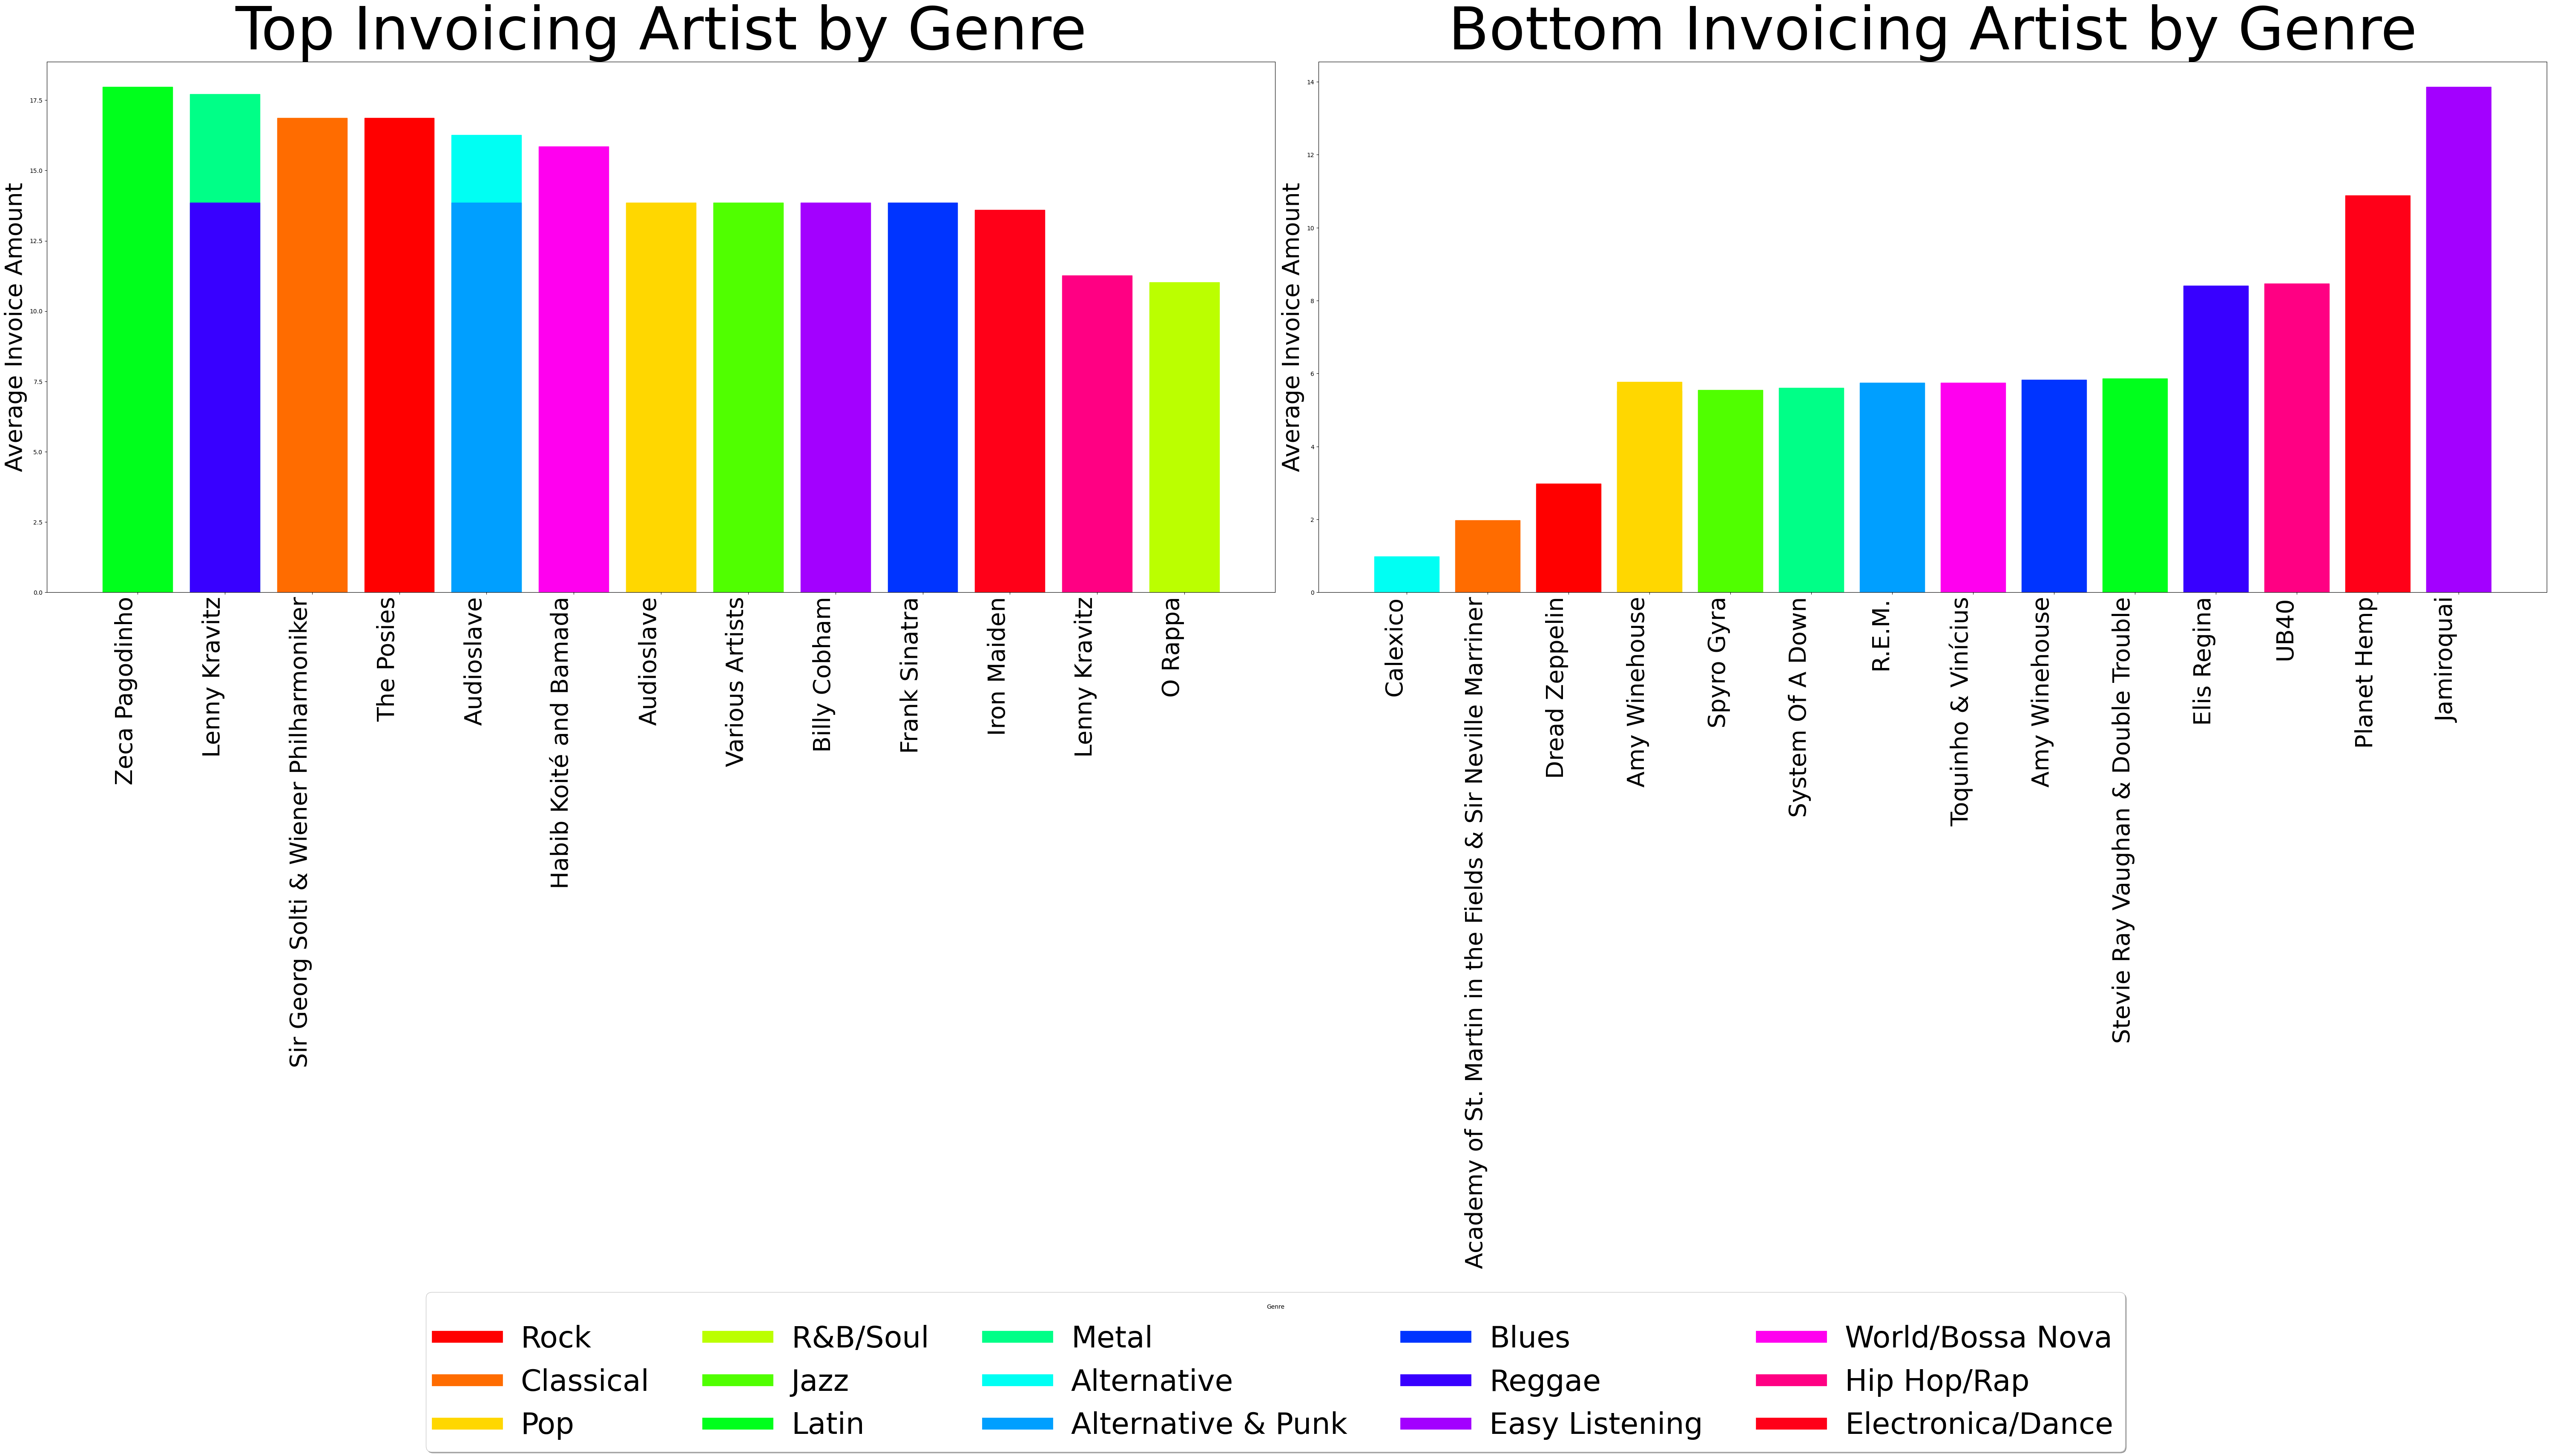

In [33]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # Import colormap module
import numpy as np

# Connect to the database
db_con = sqlite3.connect('chinook.db')

# SQL query to retrieve the average invoice amount for each artist WITH genre classification
query = """
WITH ArtistInvoiceData AS (
    SELECT
        ar.Name AS ArtistName,
        CASE
            WHEN g.Name IN ('World', 'Bossa Nova') THEN 'World/Bossa Nova'
            WHEN g.Name IN ('Rock And Roll', 'Rock') THEN 'Rock'
            WHEN g.Name IN ('Metal', 'Heavy Metal') THEN 'Metal'
            ELSE g.Name
        END AS GenreName,  -- Classify genres as requested
        AVG(inv.Total) AS AverageInvoiceAmount
    FROM artists ar
    JOIN albums al ON ar.ArtistId = al.ArtistId
    JOIN tracks t ON al.AlbumId = t.AlbumId
    JOIN genres g ON t.GenreId = g.GenreId
    JOIN invoice_items ii ON t.TrackId = ii.TrackId
    JOIN invoices inv ON ii.InvoiceId = inv.InvoiceId
    WHERE g.Name NOT IN ('Opera', 'Science Fiction', 'TV Shows', 'Comedy', 'Sci Fi & Fantasy', 'Drama', 'Soundtrack') -- Filter genres
    GROUP BY ar.Name, GenreName  -- Group by classified genre
)
SELECT
    ArtistName,
    GenreName,
    AverageInvoiceAmount
FROM ArtistInvoiceData;
"""

# Read the data into a Pandas DataFrame
artist_invoice_data = pd.read_sql_query(query, db_con)

# Separate data for top and bottom artists based on classified genres
top_artists = artist_invoice_data.loc[artist_invoice_data.groupby('GenreName')['AverageInvoiceAmount'].idxmax()]
bottom_artists = artist_invoice_data.loc[artist_invoice_data.groupby('GenreName')['AverageInvoiceAmount'].idxmin()]

# Sort top and bottom artists by AverageInvoiceAmount
top_artists = top_artists.sort_values(by=['AverageInvoiceAmount'], ascending=False)
bottom_artists = bottom_artists.sort_values(by=['AverageInvoiceAmount'], ascending=True)  # Ascending for bottom artists

# Get unique genres and assign rainbow colors
unique_genres = artist_invoice_data['GenreName'].unique()
num_genres = len(unique_genres)
colors = cm.get_cmap('hsv', num_genres)  # Use 'hsv' for rainbow colormap
genre_colors = {genre: colors(i) for i, genre in enumerate(unique_genres)}

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(60, 30))  # Create two subplots

# Plot for top artists
bars = axes[0].bar(top_artists['ArtistName'], top_artists['AverageInvoiceAmount'])
axes[0].set_title('Top Invoicing Artist by Genre', fontsize=100)
axes[0].set_ylabel('Average Invoice Amount', fontsize=40)
axes[0].set_xticklabels(top_artists['ArtistName'], rotation=90, ha='right', fontsize=40)

# Color bars based on genre using rainbow colormap
for bar, genre in zip(bars, top_artists['GenreName']):
    bar.set_color(genre_colors[genre])

# Plot for bottom artists
bars = axes[1].bar(bottom_artists['ArtistName'], bottom_artists['AverageInvoiceAmount'])
axes[1].set_title('Bottom Invoicing Artist by Genre', fontsize=100)
axes[1].set_ylabel('Average Invoice Amount', fontsize=40)
axes[1].set_xticklabels(bottom_artists['ArtistName'], rotation=90, ha='right', fontsize=40)

# Color bars based on genre using rainbow colormap
for bar, genre in zip(bars, bottom_artists['GenreName']):
    bar.set_color(genre_colors[genre])

# Create legend
legend_elements = [plt.Line2D([0], [0], color=color, lw=20, label=genre)
                   for genre, color in genre_colors.items()]
n_cols = 5  # Number of columns for the legend
fig.legend(handles=legend_elements, title='Genre', loc='lower center',
           bbox_to_anchor=(0.5, -0.15), ncol=n_cols, fontsize=50,
           fancybox=True, shadow=True)
plt.tight_layout()
plt.show()

In [34]:
!pip install ipywidgets
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# Connect to the database
db_con = sqlite3.connect('chinook.db')

# SQL query to retrieve the average invoice amount for each artist WITH genre classification
query = """
WITH ArtistInvoiceData AS (
    SELECT
        ar.Name AS ArtistName,
        CASE
            WHEN g.Name IN ('World', 'Bossa Nova') THEN 'World/Bossa Nova'
            WHEN g.Name IN ('Rock And Roll', 'Rock') THEN 'Rock'
            WHEN g.Name IN ('Metal', 'Heavy Metal') THEN 'Metal'
            ELSE g.Name
        END AS GenreName,  -- Classify genres as requested
        AVG(inv.Total) AS AverageInvoiceAmount
    FROM artists ar
    JOIN albums al ON ar.ArtistId = al.ArtistId
    JOIN tracks t ON al.AlbumId = t.AlbumId
    JOIN genres g ON t.GenreId = g.GenreId
    JOIN invoice_items ii ON t.TrackId = ii.TrackId
    JOIN invoices inv ON ii.InvoiceId = inv.InvoiceId
    WHERE g.Name NOT IN ('Opera', 'Science Fiction', 'TV Shows', 'Comedy', 'Sci Fi & Fantasy', 'Drama', 'Soundtrack') -- Filter genres
    GROUP BY ar.Name, GenreName  -- Group by classified genre
)
SELECT
    ArtistName,
    GenreName,
    AverageInvoiceAmount
FROM ArtistInvoiceData;
"""

# Read data into a Pandas DataFrame
genre_invoice_data = pd.read_sql_query(query, db_con)

# Create dropdown widget for genre selection
genre_dropdown = widgets.Dropdown(
    options=genre_invoice_data['GenreName'].unique().tolist(),
    description='Select Genre:',
    value=genre_invoice_data['GenreName'].iloc[0]  # Set initial value
)

# Create an output widget to hold the plot
output = widgets.Output()

# Function to update the plot based on dropdown selection
def update_plot(change):
    selected_genre = change.get('new', genre_dropdown.value)
    filtered_data = genre_invoice_data[genre_invoice_data['GenreName'] == selected_genre]

    # Sort artists within the selected genre by average invoice amount
    sorted_data = filtered_data.sort_values(by=['AverageInvoiceAmount'], ascending=False)

    # Clear the previous plot and create a new one within the output widget
    with output:
        output.clear_output()
        plt.figure(figsize=(10, 6))
        plt.bar(sorted_data['ArtistName'], sorted_data['AverageInvoiceAmount'], color='blue')
        plt.title(f'Average Invoice Amount for Artists in {selected_genre}')
        plt.ylabel('Average Invoice Amount')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


# Observe dropdown changes and call update_plot
genre_dropdown.observe(update_plot, names='value')

# Display the dropdown widget and the output widget
display(genre_dropdown)
display(output)

# Initial plot display
update_plot({'new': genre_dropdown.value})

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 22.5 MB/s eta 0:00:00


Dropdown(description='Select Genre:', options=('Rock', 'Classical', 'Pop', 'R&B/Soul', 'Jazz', 'Latin', 'Metal…

Output()